In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Train - Test Splitting

In [9]:
x=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


# Correlation

In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
correlation = data.corr()
correlation['Outcome'].sort_values(ascending= False)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

<AxesSubplot:>

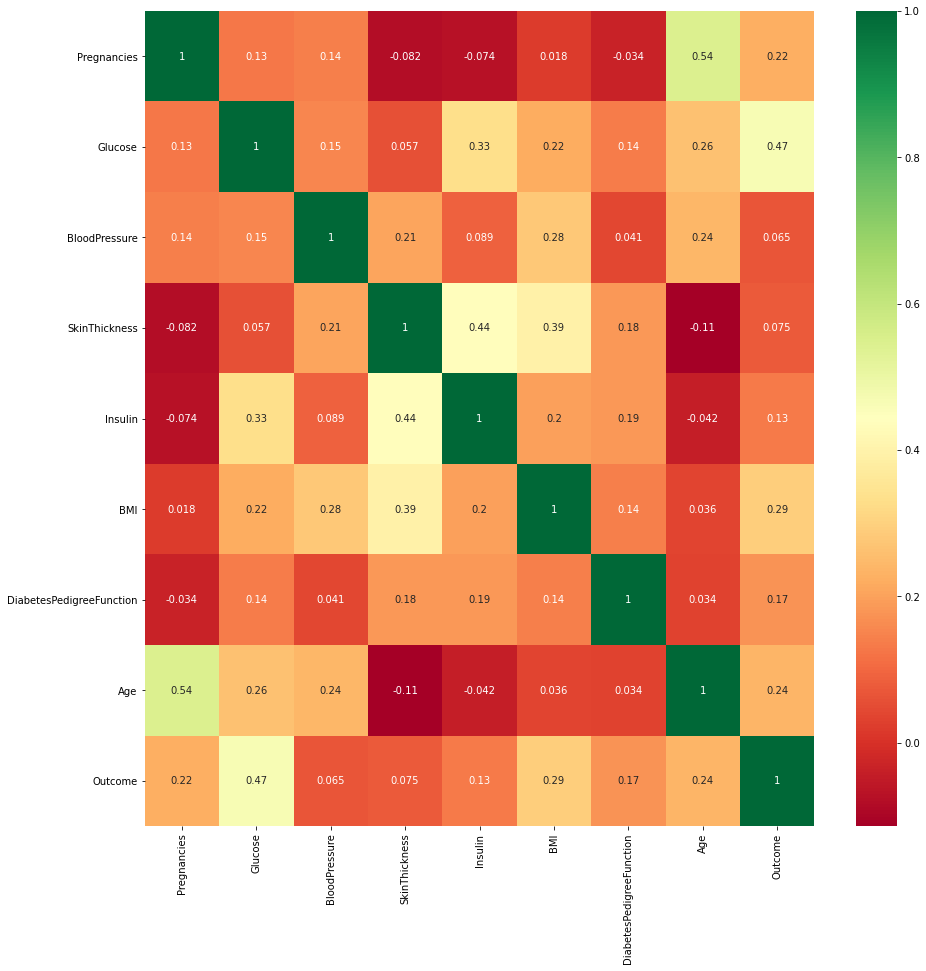

In [13]:
corrmat=data.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(15,15)) 
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

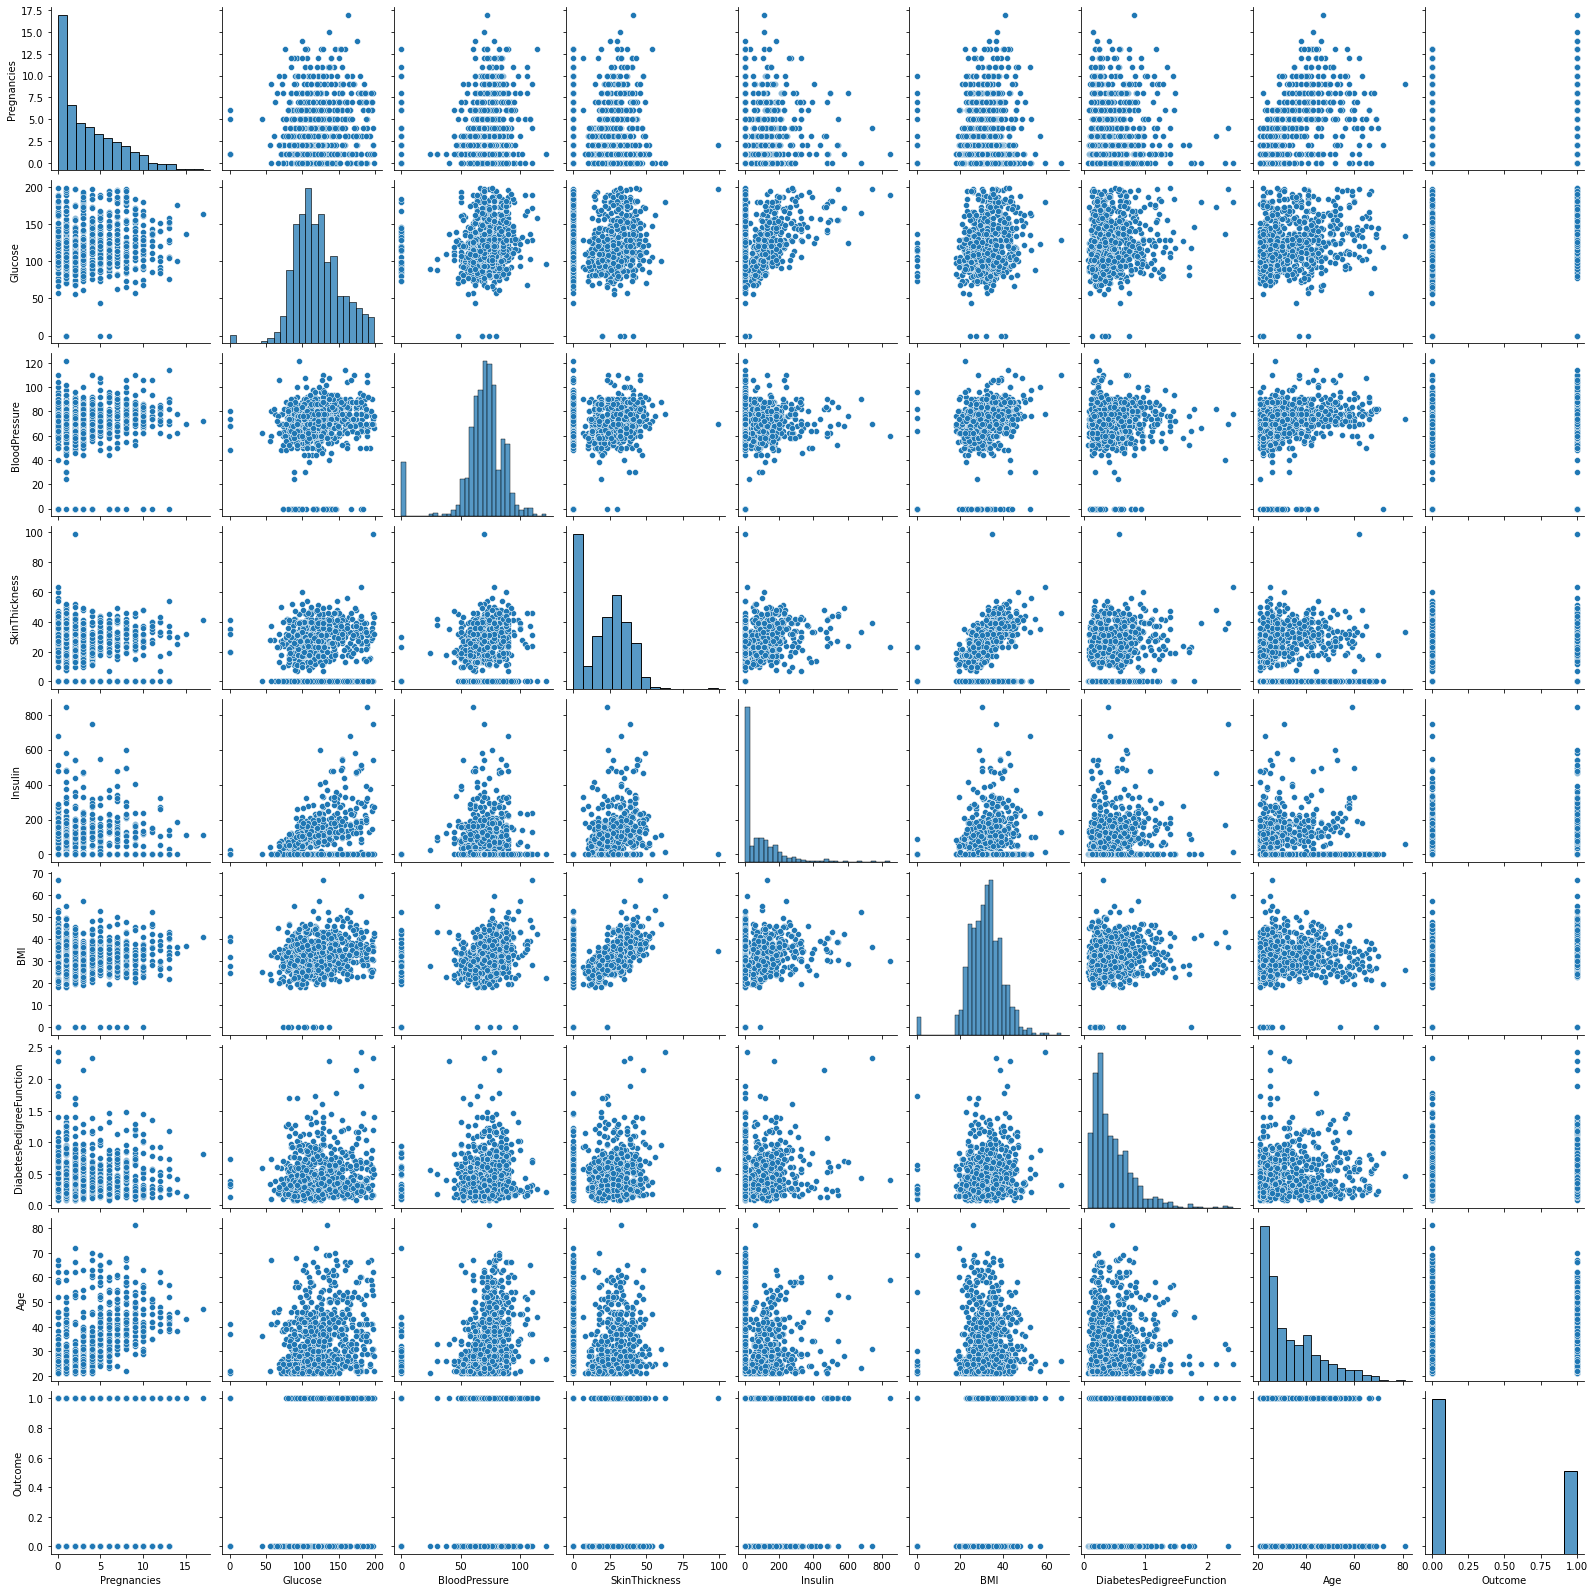

In [14]:
sns.pairplot(data)


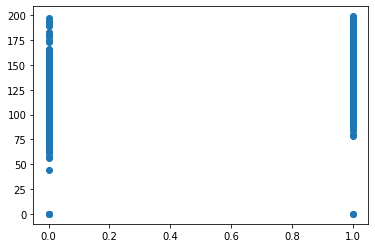

In [15]:
plt.scatter(x='Outcome',y='Glucose',data=data)


# Checking zero values 

In [16]:
print('no. of zero in Glucose = ',len(data.loc[data['Glucose']==0]))
print('no. of zero in BloodPressure = ',len(data.loc[data['BloodPressure']==0]))
print('no. of zero in SkinThickness = ',len(data.loc[data['SkinThickness']==0]))
print('no. of zero in Insulin = ',len(data.loc[data['Insulin']==0]))
print('no. of zero in BMI = ',len(data.loc[data['BMI']==0]))

no. of zero in Glucose =  5
no. of zero in BloodPressure =  35
no. of zero in SkinThickness =  227
no. of zero in Insulin =  374
no. of zero in BMI =  11


# Convert zero values into mean value

In [17]:
from sklearn.impute import SimpleImputer
fill_vals = SimpleImputer(missing_values=0,strategy='mean')
x_train = fill_vals.fit_transform(x_train)
x_test = fill_vals.fit_transform(x_test)


# model comparing

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV


In [19]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               
               'max_features':['auto', 'sqrt','log2'],
               
               'max_depth':  [int(x) for x in np.linspace(10, 1000,10)],
               
               'min_samples_split':[2, 5, 10,14],
               
               'min_samples_leaf':[1, 2, 4,6,8],
               
               'criterion':['entropy','gini']
              }

print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [20]:
model_1 = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
model_1.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [21]:
model_1 = model_1.best_estimator_

In [22]:
prediction_1=model_1.predict(x_train)
print(confusion_matrix(y_train,prediction_1))
print(accuracy_score(y_train,prediction_1))
print(classification_report(y_train,prediction_1))

[[384  17]
 [ 35 178]]
0.9153094462540716
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       401
           1       0.91      0.84      0.87       213

    accuracy                           0.92       614
   macro avg       0.91      0.90      0.90       614
weighted avg       0.92      0.92      0.91       614



In [23]:
import xgboost
clf = xgboost.XGBClassifier()

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [24]:
model_2 = RandomizedSearchCV(clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
model_2.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[23:39:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [25]:
model_2 = model_2.best_estimator_

In [26]:
prediction_2=model_2.predict(x_train)
print(confusion_matrix(y_train,prediction_2))
print(accuracy_score(y_train,prediction_2))
print(classification_report(y_train,prediction_2))

[[388  13]
 [ 44 169]]
0.9071661237785016
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       401
           1       0.93      0.79      0.86       213

    accuracy                           0.91       614
   macro avg       0.91      0.88      0.89       614
weighted avg       0.91      0.91      0.91       614



# Final model selection

In [27]:
final_model = model_1

# Final model testing on test-data

In [28]:
final_predicrion = final_model.predict(x_test)
from sklearn.model_selection import cross_val_score
score=cross_val_score(final_model,x_test,y_test,cv=10)

In [29]:
score

array([0.5       , 0.75      , 0.75      , 0.75      , 0.73333333,
       0.86666667, 0.66666667, 0.86666667, 0.93333333, 0.73333333])

In [30]:
np.mean(score)

0.755

In [31]:
prediction_1=model_1.predict(x_test)
print(confusion_matrix(y_test,final_predicrion))
print(accuracy_score(y_test,final_predicrion))
print(classification_report(y_test,final_predicrion))

[[76 23]
 [16 39]]
0.7467532467532467
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# Saving the model

In [32]:
from joblib import dump, load
dump(final_model, 'Diabetes Prediction.joblib')

['Diabetes Prediction.joblib']